# Prosper_Loan
## by (Atanda Rasheed)

## Investigation Overview

I expect that variables that influence borrowers' personal circumstances would have an effect on their ability to repay loans or default, factors such as EmploymentStatus, borrowerapr, loanstatus, IncomeRange, etc.
The Borrowerapr and lenderyield is postively correlated while both variable(Borrowerapr&lenderyield) is negatively correlated to prosperscore variable.The borrowerapr is lowest(0.07) at prosperscore of 10 during the Term period( 12 month loans)

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data dictionary to understand the dataset's variables. Data dictionary to understand the variables more form this link: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans_data = pd.read_csv('prosperLoanData.csv')
df_loans_clean = loans_data.copy()

In [3]:
#Apply lower string to all columns and repalce space with underscores.
df_loans_clean.columns = map(str.lower, df_loans_clean.columns)
df_loans_clean.columns = df_loans_clean.columns.str.replace(' ', '_')
df_loans = df_loans_clean.loc[:, ['listingcreationdate', 'term', 'loanstatus', 'closeddate', 'borrowerapr',
                         'borrowerrate', 'lenderyield', 'prosperrating_(alpha)', 'prosperscore', 'listingcategory_(numeric)',
                         'borrowerstate', 'occupation', 'employmentstatus', 'amountdelinquent',
                         'incomerange', 'statedmonthlyincome',
                         'loancurrentdaysdelinquent',
                         'loanoriginalamount', 'loanoriginationdate', 
                         'monthlyloanpayment', 'lp_servicefees', 'investors','debttoincomeratio']]
df_loans.columns
df_loans.dropna(subset =['closeddate', 'borrowerapr','borrowerstate', \
                            'occupation', 'employmentstatus','debttoincomeratio'], inplace = True)
#Change datatype for all other categorical columns
df_loans['employmentstatus'] = df_loans['employmentstatus'].astype('category')
df_loans['occupation'] = df_loans['occupation'].astype('category')
df_loans['loanstatus']= df_loans['loanstatus'].astype('category')
df_loans['borrowerstate)'] = df_loans['borrowerstate'].astype('category')
numeric_vars = ['term', 'borrowerapr', 'lenderyield', 'prosperrating_(alpha)', 'prosperscore', 'listingcategory_(numeric)', 'amountdelinquent','incomerange','statedmonthlyincome','loancurrentdaysdelinquent','loanoriginalamount','monthlyloanpayment','lp_servicefees','investors']
categoric_vars = ['listingcreationdate', 'closeddate', 'loanstatus','closeddate','borrowerstate','occupation','employmentstatus','loanoriginationdate','investors']

In [4]:
# Convert ProsperRating & IncomeRange into ordered categorical types
ordinal_var_dict = {'prosperrating_(alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'incomerange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
                   
                  }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_loans[var] = df_loans[var].astype(ordered_var)

In [5]:
loan_analysis = df_loans[df_loans['loanstatus'].isin(['Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 
                                                          'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)'\
                                                         'Past Due (16-30 days)', 'Past Due (>120 days)'])]
loan_analysis['default'] = np.where(loan_analysis['loanstatus'] == 'Completed', 0, 1)

In [6]:
samples = np.random.choice(df_loans.shape[0], 2000, replace = False)
loans_samp = df_loans.loc[samples,:]

## Distribution of Borrower Annual Percentage on the ProsperLoan.

Borrowerapr distribution in the dataset show the prosperloan borrowerapr shows that it bimodial skewed disribution,highest peak at 30% and above 35%.the distribution of diamond prices takes on a multimodal shape.

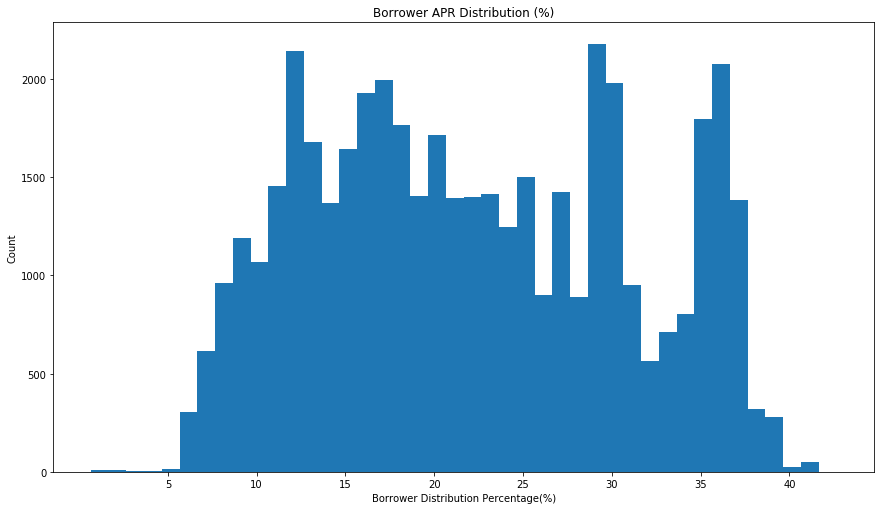

In [7]:
# univariate plots of borrowerapr using different binsize and %.
binsize = 1
borrowed_APR_percentage = df_loans['borrowerapr']*100
bins = np.arange(df_loans['borrowerapr'].min()*100, df_loans['borrowerapr'].max()*100+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(x = borrowed_APR_percentage, bins = bins)
plt.title('Borrower APR Distribution (%)')
plt.xlabel('Borrower Distribution Percentage(%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show()

## Distribution of Loan Category Listed.
The number reason borrower accessed the prosperloan is for Debt Consolidation


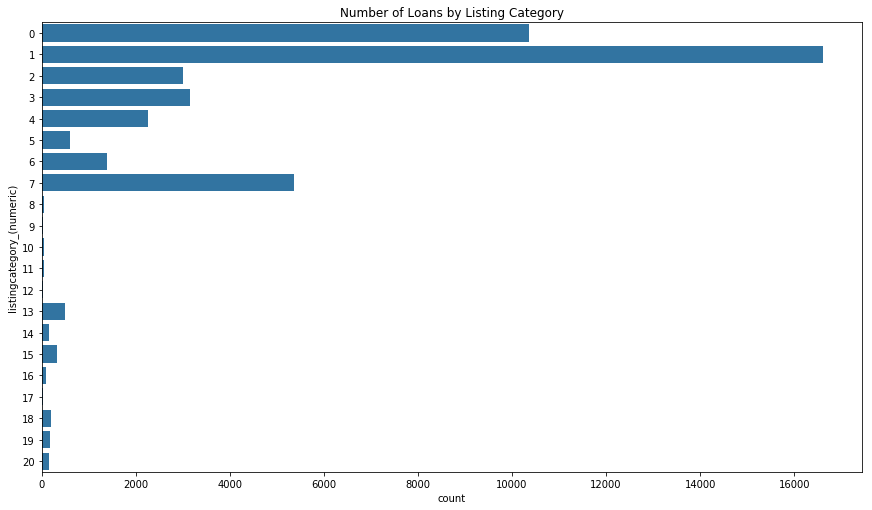

In [8]:
# univariate plots of listingcategory_(numeric)
plt.figure(figsize=[14.70, 8.27])
list_category = df_loans['listingcategory_(numeric)'].unique()
list_category.sort()
plt.xlabel('Loan Original Amount')
base_color = sb.color_palette()[0]
sb.countplot(data = df_loans, y = 'listingcategory_(numeric)', color = base_color,order=list_category);
plt.title('Number of Loans by Listing Category');

## The Average Borrower Annual Percentage by Default.
The default loan status clearly shows that the borrowerapr was higher for borrower that default to borrower is not defaulted.


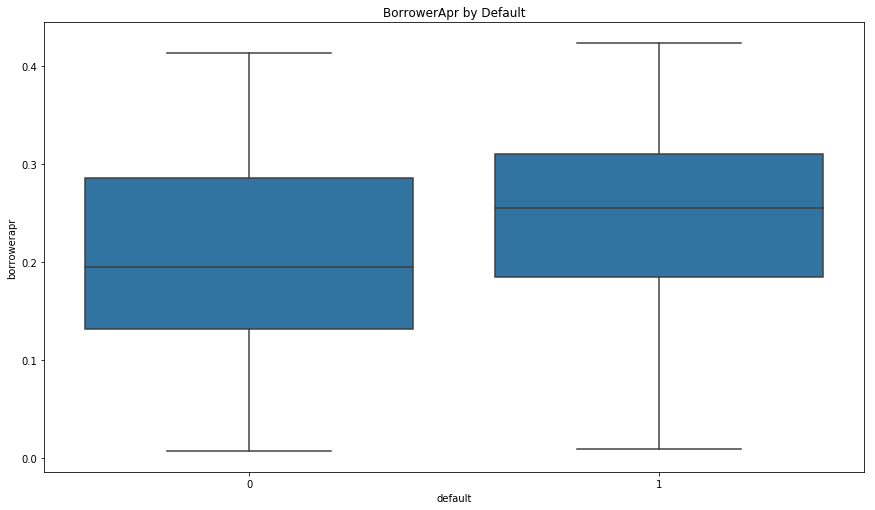

In [9]:
#To show the average mean of borrowerapr by default.
plt.figure(figsize=[14.70, 8.27])
sb.boxplot(data = loan_analysis, x = 'default', y = 'borrowerapr', color = base_color);
plt.title('BorrowerApr by Default');

##HeatMap of the Numeric Variable.
The Heatmap provided a clear opportunity to see the relationship between all numeric variable to see relationship each variable.
Postive relationship esixt between borrowerapr and lenderyield.
Postive correlation exist between loanoriginalamount and scheduled mothlyloanpayment.

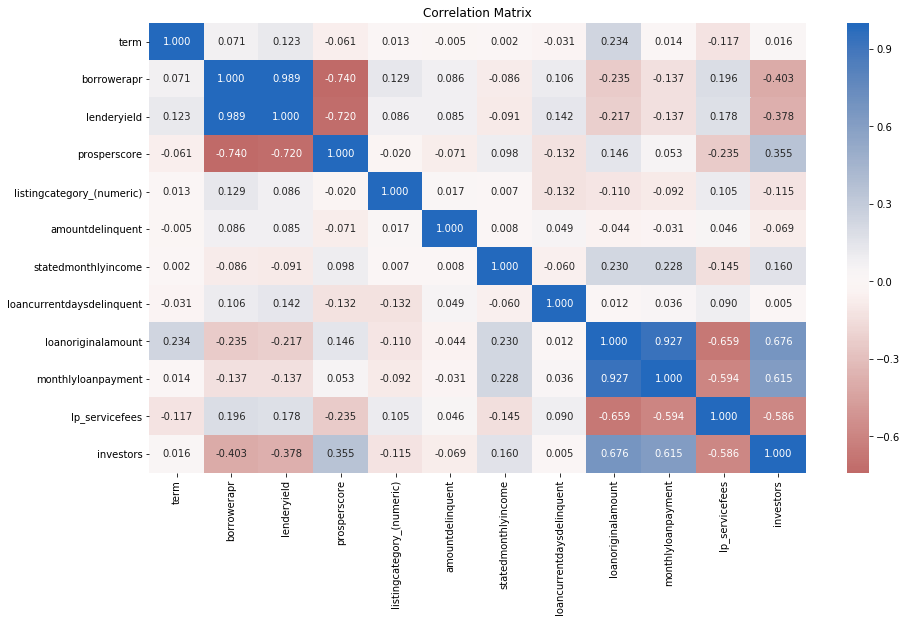

In [10]:
plt.figure(figsize=[14.70, 8.27])
sb.heatmap(df_loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

##Lenderyield vs Borrower Annual Percentage by Prosperscore
A plot shows that as lenderyield increases the borrowerapr increase while prosperscore decreases.

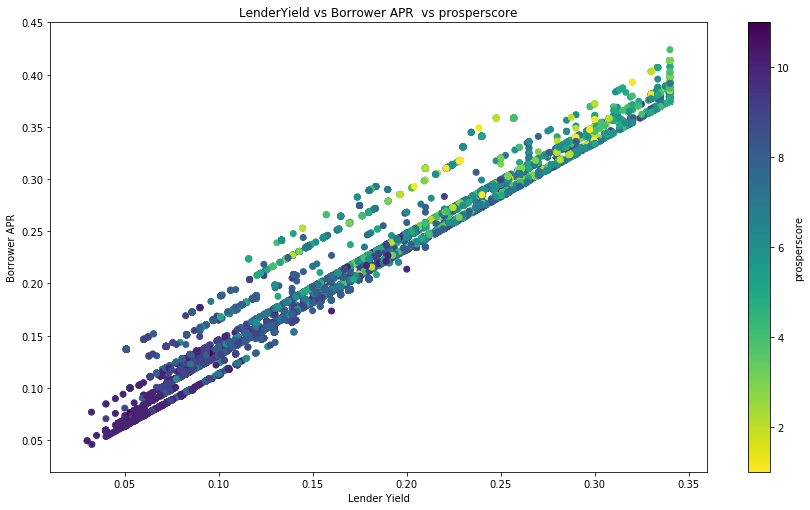

In [11]:
# LenderYield vs Borrower APR  vs Prosperscore
plt.figure(figsize=[14.70, 8.27])
plt.scatter(data=df_loans,x='lenderyield', y = 'borrowerapr',c='prosperscore',cmap = 'viridis_r')
plt.colorbar(label = 'prosperscore');
plt.title('LenderYield vs Borrower APR  vs prosperscore');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

##LoanOriginalamount vs monthlyloanpayment by loanstatus.
The plot was on a transformative scale and clearly shows that linear relationship among the 3 variables.

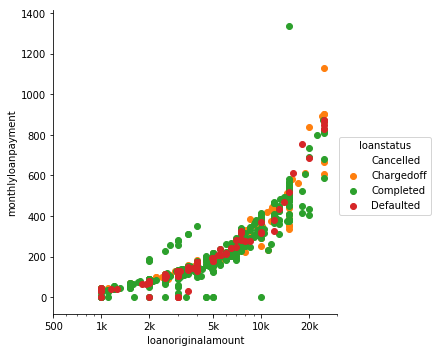

In [12]:
#Plot the loanoriginal amount vs monthlyloanpayment across loanstatus.
plt.figure(figsize=[14.70, 8.27])
g = sb.FacetGrid(data = loans_samp, hue = 'loanstatus', size = 5);
g.map(plt.scatter, 'loanoriginalamount', 'monthlyloanpayment');
plt.xscale('log');
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k']);
g.add_legend();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Prosper_loan_Data.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosper_loan_Data.ipynb to slides
[NbConvertApp] Writing 608925 bytes to Prosper_loan_Data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Prosper_loan_Data.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not fou